<a href="https://colab.research.google.com/github/dddonghwa/dacon-struggle/blob/main/housing_0126.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### 데이터셋 피처

id : 데이터 고유 id  
OverallQual : 전반적 재료와 마감 품질  
YearBuilt : 완공 연도  
YearRemodAdd : 리모델링 연도  
ExterQual : 외관 재료 품질  
BsmtQual : 지하실 높이  
TotalBsmtSF : 지하실 면적   
1stFlrSF : 1층 면적   
GrLivArea : 지상층 생활 면적  
FullBath : 지상층 화장실 개수   
KitchenQual : 부억 품질   
GarageYrBlt : 차고 완공 연도  
GarageCars: 차고 자리 개수  
GarageArea: 차고 면적   
target : 집값(달러 단위)  



In [ ]:
import pandas as pd
import os
import os.path as osp
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [ ]:
base_dir = './drive/MyDrive/Colab Notebooks/DACrew/housing/dataset'

train = pd.read_csv(osp.join(base_dir, 'train.csv'))
test = pd.read_csv(osp.join(base_dir, 'test.csv'))

train.drop('id', axis=1, inplace=True)
test.drop('id', axis=1, inplace=True)
print( train.shape, test.shape)

train.head()

(1350, 14) (1350, 13)


,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250
1,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000
2,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000
3,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,135000
4,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,250000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Overall Qual    1350 non-null   int64 
 1   Gr Liv Area     1350 non-null   int64 
 2   Exter Qual      1350 non-null   object
 3   Garage Cars     1350 non-null   int64 
 4   Garage Area     1350 non-null   int64 
 5   Kitchen Qual    1350 non-null   object
 6   Total Bsmt SF   1350 non-null   int64 
 7   1st Flr SF      1350 non-null   int64 
 8   Bsmt Qual       1350 non-null   object
 9   Full Bath       1350 non-null   int64 
 10  Year Built      1350 non-null   int64 
 11  Year Remod/Add  1350 non-null   int64 
 12  Garage Yr Blt   1350 non-null   int64 
 13  target          1350 non-null   int64 
dtypes: int64(11), object(3)
memory usage: 147.8+ KB


In [ ]:
train.describe()

,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
count,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,6.208889,1513.542222,1.870370,502.014815,1082.644444,1167.474074,1.560741,1972.987407,1985.099259,1978.471852,186406.312593
std,1.338015,487.523239,0.652483,191.389956,384.067713,375.061407,0.551646,29.307257,20.153244,25.377278,78435.424758
min,2.000000,480.000000,1.000000,100.000000,105.000000,480.000000,0.000000,1880.000000,1950.000000,1900.000000,12789.000000
25%,5.000000,1144.000000,1.000000,368.000000,816.000000,886.250000,1.000000,1955.000000,1968.000000,1961.000000,135000.000000
50%,6.000000,1445.500000,2.000000,484.000000,1009.000000,1092.500000,2.000000,1976.000000,1993.000000,1978.500000,165375.000000
75%,7.000000,1774.500000,2.000000,588.000000,1309.500000,1396.500000,2.000000,2002.000000,2004.000000,2002.000000,217875.000000
max,10.000000,4476.000000,5.000000,1488.000000,2660.000000,2898.000000,4.000000,2010.000000,2010.000000,2207.000000,745000.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa1d94e1b90>,
      dtype=object)

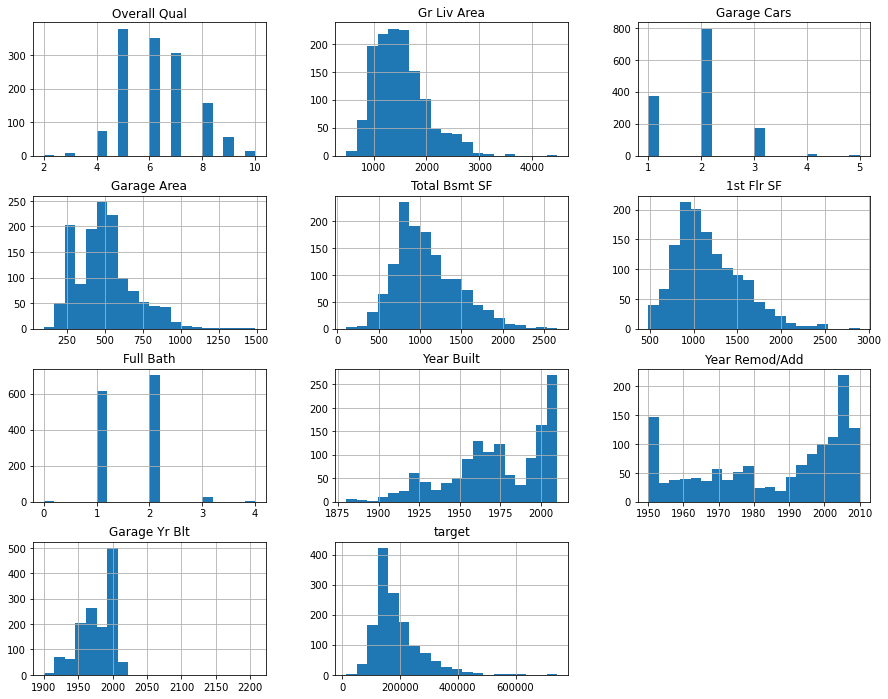

In [ ]:
train.hist(figsize=(15,12), bins=20)

- target 외도 확인
- Garge Yr Blt 이상치
- 면적 관련 피처 이상치 제거
- 년도 처리 : 년도 관련 피처가 범위가 조금씩 달라서 ~~min 값을 빼주거나~~ 현재 년도(2022) 또는 max 년도에서 빼주기

## 전처리

In [ ]:
# 피처 재정렬
cols = ['Year Built','Year Remod/Add','Garage Yr Blt', # 년도
        'Overall Qual',  'Exter Qual','Kitchen Qual','Bsmt Qual', # 품질
        'Gr Liv Area','Total Bsmt SF', '1st Flr SF', 'Garage Area','Garage Cars'] # 면적
train = train[cols+['target']]
test = test[cols]

train.head()

,Year Built,Year Remod/Add,Garage Yr Blt,Overall Qual,Exter Qual,Kitchen Qual,Bsmt Qual,Gr Liv Area,Total Bsmt SF,1st Flr SF,Garage Area,Garage Cars,target
0,2003,2003,2003,10,Ex,Ex,Ex,2392,2392,2392,968,3,386250
1,2006,2007,2006,7,Gd,Gd,Ex,1352,1352,1352,466,2,194000
2,1967,1967,1967,5,TA,TA,TA,900,864,900,288,1,123000
3,1900,2006,2000,5,TA,Gd,TA,1174,680,680,576,2,135000
4,2005,2005,2005,7,Gd,Gd,Gd,1958,1026,1026,936,3,250000


In [ ]:
# 중복 값 확인
print("제거 전 :", train.shape)
train = train.drop_duplicates()
print("제거 후 :", train.shape)

제거 전 : (1350, 13)
제거 후 : (1349, 13)


In [ ]:
# Garage Yr Blt 이상치 제거
print("제거 전 :", train.shape)
train = train[train['Garage Yr Blt'] < 2050]
print("제거 후 :", train.shape)

제거 전 : (1349, 13)
제거 후 : (1348, 13)


In [ ]:
# 숫자형 피처 외도 확인
train.skew()

Year Built       -0.646165
Year Remod/Add   -0.498784
Garage Yr Blt    -0.618989
Overall Qual      0.348257
Gr Liv Area       0.979821
Total Bsmt SF     0.746860
1st Flr SF        0.833689
Garage Area       0.888818
Garage Cars       0.363479
target            1.723462
dtype: float64

In [ ]:
# target log 변환 후 외도 확인 
print("log 변환 후 외도 :", np.log1p(train['target']).skew())

log 변환 후 외도 : 0.0837711283406358


- 예측값을 np.log1p(target)으로 사용

In [ ]:
# 면적 관련 피처 이상치 제거
area_cols = ['Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF']

def cut_outlier(df_, cols, percent=0.005):
  df = df_.copy()
  for col in cols :
    min_threshold = df[col].quantile(percent)
    max_threshold = df[col].quantile(1-percent)
    df = df[(df[col]>min_threshold) & (df[col]<max_threshold)]
  return df

print("이상치 제거 전 외도 :\n", train[area_cols].skew())
# train = cut_outlier(train, area_cols)
print()
print("이상치 제거 후 외도 : \n", train[area_cols].skew())

이상치 제거 전 외도 :
 Gr Liv Area      0.979821
Garage Area      0.888818
Total Bsmt SF    0.746860
1st Flr SF       0.833689
dtype: float64

이상치 제거 후 외도 : 
 Gr Liv Area      0.979821
Garage Area      0.888818
Total Bsmt SF    0.746860
1st Flr SF       0.833689
dtype: float64


- ~~여러 percent(0.005, 0.01, 0.05, 0.1, 0.2)로 실험해본 결과 데이터 갯수를 적당히 보존하면서 외도를 줄일 수 있는 0.005를 채택~~

In [ ]:
# 카테고리/숫자 컬럼명 저장
num_cols = train.dtypes[train.dtypes != np.object].index
cat_cols = train.dtypes[train.dtypes == np.object].index

print(len(num_cols), "numeric columns : ", num_cols.tolist()) # target
print(len(cat_cols), "categorical columns :", cat_cols.tolist())

10 numeric columns :  ['Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Overall Qual', 'Gr Liv Area', 'Total Bsmt SF', '1st Flr SF', 'Garage Area', 'Garage Cars', 'target']
3 categorical columns : ['Exter Qual', 'Kitchen Qual', 'Bsmt Qual']


- 카테고리 컬럼 모두 '품질'에 관련된 변수

In [ ]:
# 품질 컬럼 고유값 확인
np.unique(train[cat_cols].squeeze())

array(['Ex', 'Fa', 'Gd', 'Po', 'TA'], dtype=object)

- 품질 카테고리 Poor(Po) → Fa(Fair) →Typical/Average(TA)→ Good(Gd) → Excellent(Ex)이므로 각 1~5 값으로 매핑
- Overall Qual 와 Exter Qual + Kitchen Qual + Bsmt Qual = Sum Qual가 target과 상관관계가 있는지 확인, 상관계수가 크면 두 피처 중 하나만 선택

In [ ]:
# 품질 컬럼 라벨 인코딩

def label_encoder(df_, qual_cols):
  df = df_.copy()
  mapping={
      'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1
  }
  for col in qual_cols :
    df[col] = df[col].map(mapping)
  return df

train = label_encoder(train, cat_cols)
test = label_encoder(test, cat_cols)
train.head()

,Year Built,Year Remod/Add,Garage Yr Blt,Overall Qual,Exter Qual,Kitchen Qual,Bsmt Qual,Gr Liv Area,Total Bsmt SF,1st Flr SF,Garage Area,Garage Cars,target
0,2003,2003,2003,10,5,5,5,2392,2392,2392,968,3,386250
1,2006,2007,2006,7,4,4,5,1352,1352,1352,466,2,194000
2,1967,1967,1967,5,3,3,3,900,864,900,288,1,123000
3,1900,2006,2000,5,3,4,3,1174,680,680,576,2,135000
4,2005,2005,2005,7,4,4,4,1958,1026,1026,936,3,250000


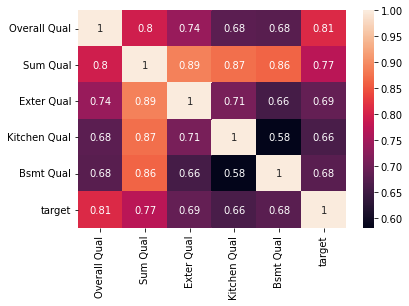

In [ ]:
train['Sum Qual'] = train[['Exter Qual','Kitchen Qual','Bsmt Qual']].sum(axis=1)
sns.heatmap(train[['Overall Qual', 'Sum Qual','Exter Qual','Kitchen Qual','Bsmt Qual', 'target']].corr(), annot=True)

- Overall Qual이 다른 변수들에 비해 target 과의 상관관계가 높기 때문에 이를 삭제하고 라벨인코딩된 Exter Qual, Kitchen Qual, Bsmt Qual만 사용

In [ ]:
# train.drop(['Overall Qual', 'Sum Qual'], axis=1, inplace=True)
# test.drop(['Overall Qual'], axis=1, inplace=True)
train.drop(['Sum Qual'], axis=1, inplace=True)
train.head() 

,Year Built,Year Remod/Add,Garage Yr Blt,Overall Qual,Exter Qual,Kitchen Qual,Bsmt Qual,Gr Liv Area,Total Bsmt SF,1st Flr SF,Garage Area,Garage Cars,target
0,2003,2003,2003,10,5,5,5,2392,2392,2392,968,3,386250
1,2006,2007,2006,7,4,4,5,1352,1352,1352,466,2,194000
2,1967,1967,1967,5,3,3,3,900,864,900,288,1,123000
3,1900,2006,2000,5,3,4,3,1174,680,680,576,2,135000
4,2005,2005,2005,7,4,4,4,1958,1026,1026,936,3,250000


In [ ]:
# 년도 처리
year_cols = ['Year Built', 'Year Remod/Add', 'Garage Yr Blt']
train[year_cols].describe() # max 년도 확인 2010

,Year Built,Year Remod/Add,Garage Yr Blt
count,1348.000000,1348.000000,1348.000000
mean,1972.942878,1985.071958,1978.286350
std,29.305936,20.155263,24.613259
min,1880.000000,1950.000000,1900.000000
25%,1955.000000,1968.000000,1961.000000
50%,1976.000000,1993.000000,1978.000000
75%,2002.000000,2004.000000,2002.000000
max,2010.000000,2010.000000,2010.000000


In [ ]:
def sub_year(df_, year_cols, year_max=2010):
  df = df_.copy()
  for col in year_cols :
    df[col] = year_max-df[col]
  return df

train = sub_year(train, year_cols)
test = sub_year(test, year_cols)
train[year_cols].describe()

,Year Built,Year Remod/Add,Garage Yr Blt
count,1348.000000,1348.000000,1348.000000
mean,37.057122,24.928042,31.713650
std,29.305936,20.155263,24.613259
min,0.000000,0.000000,0.000000
25%,8.000000,6.000000,8.000000
50%,34.000000,17.000000,32.000000
75%,55.000000,42.000000,49.000000
max,130.000000,60.000000,110.000000


In [ ]:
print(train.shape)
train.describe()

(1348, 13)


,Year Built,Year Remod/Add,Garage Yr Blt,Overall Qual,Exter Qual,Kitchen Qual,Bsmt Qual,Gr Liv Area,Total Bsmt SF,1st Flr SF,Garage Area,Garage Cars,target
count,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000
mean,37.057122,24.928042,31.713650,6.206973,3.425816,3.555638,3.606083,1512.560089,1082.237389,1167.179525,501.778932,1.868694,186284.660237
std,29.305936,20.155263,24.613259,1.337943,0.573856,0.662287,0.694570,486.646713,384.138075,375.184101,191.335781,0.650372,78429.915623
min,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,1.000000,480.000000,105.000000,480.000000,100.000000,1.000000,12789.000000
25%,8.000000,6.000000,8.000000,5.000000,3.000000,3.000000,3.000000,1143.750000,816.000000,885.750000,367.500000,1.000000,134975.000000
50%,34.000000,17.000000,32.000000,6.000000,3.000000,3.000000,4.000000,1444.500000,1008.000000,1092.000000,484.000000,2.000000,165125.000000
75%,55.000000,42.000000,49.000000,7.000000,4.000000,4.000000,4.000000,1773.500000,1308.500000,1393.500000,588.000000,2.000000,217500.000000
max,130.000000,60.000000,110.000000,10.000000,5.000000,5.000000,5.000000,4476.000000,2660.000000,2898.000000,1488.000000,5.000000,745000.000000


In [ ]:
print(test.shape)
test.describe()

(1350, 12)


,Year Built,Year Remod/Add,Garage Yr Blt,Overall Qual,Exter Qual,Kitchen Qual,Bsmt Qual,Gr Liv Area,Total Bsmt SF,1st Flr SF,Garage Area,Garage Cars
count,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,36.462222,24.741481,31.542963,6.237037,3.441481,3.540000,3.590370,1524.071111,1101.222222,1175.714815,499.867407,1.871852
std,29.799448,20.818442,25.771750,1.370057,0.588295,0.653065,0.706044,514.410852,431.641042,406.858231,186.267579,0.651639
min,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,1.000000,407.000000,173.000000,407.000000,160.000000,1.000000
25%,8.000000,6.000000,8.000000,5.000000,3.000000,3.000000,3.000000,1169.750000,825.250000,887.250000,365.250000,1.000000
50%,34.000000,15.000000,28.000000,6.000000,3.000000,3.000000,4.000000,1472.500000,1024.000000,1098.000000,484.000000,2.000000
75%,54.000000,44.000000,49.000000,7.000000,4.000000,4.000000,4.000000,1742.250000,1338.750000,1409.500000,578.750000,2.000000
max,131.000000,60.000000,115.000000,10.000000,5.000000,5.000000,5.000000,5642.000000,6110.000000,5095.000000,1418.000000,4.000000


In [ ]:
# ! pip install catboost
# ! pip install ngboost

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from catboost import CatBoostRegressor, Pool
from ngboost import NGBRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold

In [ ]:
# 평가 기준 정의

def NMAE(true, pred):
    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))
    return score

In [ ]:
nmae_score = make_scorer(NMAE, greater_is_better=False)
kf = KFold(n_splits = 10, random_state = 42, shuffle = True)

In [ ]:
X = train.drop(['target'], axis = 1)
y = np.log1p(train.target)

target = test[X.columns]

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

lr_pred = np.zeros(target.shape[0])
lr_val = []
for n, (tr_idx, val_idx) in enumerate(kf.split(X, y)) :
    print(f'{n + 1} FOLD Training.....')
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], np.expm1(y.iloc[val_idx])
    
    lr = LinearRegression(normalize=True)
    lr.fit(tr_x, tr_y)
    
    val_pred = np.expm1(lr.predict(val_x))
    val_nmae = NMAE(val_y, val_pred)
    lr_val.append(val_nmae)
    print(f'{n + 1} FOLD NMAE = {val_nmae}\n')
    
    target_data = Pool(data = target, label = None)
    fold_pred = lr.predict(target) / 10
    lr_pred += fold_pred
print(f'10FOLD Mean of NMAE = {np.mean(lr_val)} & std = {np.std(lr_val)}')

1 FOLD Training.....
1 FOLD NMAE = 0.09923184122687581

2 FOLD Training.....
2 FOLD NMAE = 0.11168980780004675

3 FOLD Training.....
3 FOLD NMAE = 0.08675544406972015

4 FOLD Training.....
4 FOLD NMAE = 0.09829344724683188

5 FOLD Training.....
5 FOLD NMAE = 0.08140203708906109

6 FOLD Training.....
6 FOLD NMAE = 0.1090240641763853

7 FOLD Training.....
7 FOLD NMAE = 0.09593821087236686

8 FOLD Training.....
8 FOLD NMAE = 0.0990245187530008

9 FOLD Training.....
9 FOLD NMAE = 0.10892250599636445

10 FOLD Training.....
10 FOLD NMAE = 0.08903061038582398

10FOLD Mean of NMAE = 0.09793124876164769 & std = 0.009578523981126293


In [ ]:
rg_pred = np.zeros(target.shape[0])
rg_val = []
for n, (tr_idx, val_idx) in enumerate(kf.split(X, y)) :
    print(f'{n + 1} FOLD Training.....')
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], np.expm1(y.iloc[val_idx])
    
    rg = Ridge()
    rg.fit(tr_x, tr_y)
    
    val_pred = np.expm1(rg.predict(val_x))
    val_nmae = NMAE(val_y, val_pred)
    rg_val.append(val_nmae)
    print(f'{n + 1} FOLD NMAE = {val_nmae}\n')
    
    target_data = Pool(data = target, label = None)
    fold_pred = rg.predict(target) / 10
    rg_pred += fold_pred
print(f'10FOLD Mean of NMAE = {np.mean(rg_val)} & std = {np.std(rg_val)}')

1 FOLD Training.....
1 FOLD NMAE = 0.0992317522293439

2 FOLD Training.....
2 FOLD NMAE = 0.11169894720530979

3 FOLD Training.....
3 FOLD NMAE = 0.08673921843268459

4 FOLD Training.....
4 FOLD NMAE = 0.0983083681446629

5 FOLD Training.....
5 FOLD NMAE = 0.08137116946063583

6 FOLD Training.....
6 FOLD NMAE = 0.10900728188794068

7 FOLD Training.....
7 FOLD NMAE = 0.09593691182582255

8 FOLD Training.....
8 FOLD NMAE = 0.09898379875500164

9 FOLD Training.....
9 FOLD NMAE = 0.10893382366811546

10 FOLD Training.....
10 FOLD NMAE = 0.08903962845629934

10FOLD Mean of NMAE = 0.09792509000658167 & std = 0.00958520608080758


In [ ]:
ls_pred = np.zeros(target.shape[0])
ls_val = []
for n, (tr_idx, val_idx) in enumerate(kf.split(X, y)) :
    print(f'{n + 1} FOLD Training.....')
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], np.expm1(y.iloc[val_idx])
    
    ls = Lasso()
    ls.fit(tr_x, tr_y)
    
    val_pred = np.expm1(ls.predict(val_x))
    val_nmae = NMAE(val_y, val_pred)
    ls_val.append(val_nmae)
    print(f'{n + 1} FOLD NMAE = {val_nmae}\n')
    
    target_data = Pool(data = target, label = None)
    fold_pred = ls.predict(target) / 10
    ls_pred += fold_pred
print(f'10FOLD Mean of NMAE = {np.mean(ls_val)} & std = {np.std(ls_val)}')

In [ ]:
el_pred = np.zeros(target.shape[0])
el_val = []
for n, (tr_idx, val_idx) in enumerate(kf.split(X, y)) :
    print(f'{n + 1} FOLD Training.....')
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], np.expm1(y.iloc[val_idx])
    
    el = ElasticNet()
    el.fit(tr_x, tr_y)
    
    val_pred = np.expm1(el.predict(val_x))
    val_nmae = NMAE(val_y, val_pred)
    el_val.append(val_nmae)
    print(f'{n + 1} FOLD NMAE = {val_nmae}\n')
    
    target_data = Pool(data = target, label = None)
    fold_pred = el.predict(target) / 10
    el_pred += fold_pred
print(f'10FOLD Mean of NMAE = {np.mean(el_val)} & std = {np.std(el_val)}')

In [ ]:
gbr_pred = np.zeros(target.shape[0])
gbr_val = []
for n, (tr_idx, val_idx) in enumerate(kf.split(X, y)) :
    print(f'{n + 1} FOLD Training.....')
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], np.expm1(y.iloc[val_idx])
    
    gbr = GradientBoostingRegressor(random_state = 42, max_depth = 4, learning_rate = 0.05, n_estimators = 1000)
    gbr.fit(tr_x, tr_y)
    
    val_pred = np.expm1(gbr.predict(val_x))
    val_nmae = NMAE(val_y, val_pred)
    gbr_val.append(val_nmae)
    print(f'{n + 1} FOLD NMAE = {val_nmae}\n')
    
    fold_pred = gbr.predict(target) / 10
    gbr_pred += fold_pred
print(f'10FOLD Mean of NMAE = {np.mean(gbr_val)} & std = {np.std(gbr_val)}')

1 FOLD Training.....
1 FOLD NMAE = 0.09803870395646308

2 FOLD Training.....
2 FOLD NMAE = 0.1101439223596343

3 FOLD Training.....
3 FOLD NMAE = 0.08867731767761486

4 FOLD Training.....
4 FOLD NMAE = 0.09996515709618621

5 FOLD Training.....
5 FOLD NMAE = 0.08293699342514636

6 FOLD Training.....
6 FOLD NMAE = 0.10117594918702266

7 FOLD Training.....
7 FOLD NMAE = 0.0937557950289396

8 FOLD Training.....
8 FOLD NMAE = 0.11147463416265234

9 FOLD Training.....
9 FOLD NMAE = 0.10951365799534309

10 FOLD Training.....
10 FOLD NMAE = 0.09233181579151595

10FOLD Mean of NMAE = 0.09880139466805185 & std = 0.009127325768544787


In [ ]:
rf_pred = np.zeros(target.shape[0])
rf_val = []
for n, (tr_idx, val_idx) in enumerate(kf.split(X, y)) :
    print(f'{n + 1} FOLD Training.....')
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], np.expm1(y.iloc[val_idx])
    
    rf = RandomForestRegressor(random_state = 42, criterion = 'mae')
    rf.fit(tr_x, tr_y)
    
    val_pred = np.expm1(rf.predict(val_x))
    val_nmae = NMAE(val_y, val_pred)
    rf_val.append(val_nmae)
    print(f'{n + 1} FOLD NMAE = {val_nmae}\n')
    
    fold_pred = rf.predict(target) / 10
    rf_pred += fold_pred
print(f'10FOLD Mean of NMAE = {np.mean(rf_val)} & std = {np.std(rf_val)}')

1 FOLD Training.....
1 FOLD NMAE = 0.10160898323780236

2 FOLD Training.....
2 FOLD NMAE = 0.10971558405889792

3 FOLD Training.....
3 FOLD NMAE = 0.09354053326503256

4 FOLD Training.....
4 FOLD NMAE = 0.1054261162511045

5 FOLD Training.....
5 FOLD NMAE = 0.08317217945824834

6 FOLD Training.....
6 FOLD NMAE = 0.09633843458007074

7 FOLD Training.....
7 FOLD NMAE = 0.08965629346310174

8 FOLD Training.....
8 FOLD NMAE = 0.10299739701676291

9 FOLD Training.....
9 FOLD NMAE = 0.10554036755318405

10 FOLD Training.....
10 FOLD NMAE = 0.09535035234295483

10FOLD Mean of NMAE = 0.09833462412271601 & std = 0.007780027222804102


In [ ]:
ngb_pred = np.zeros(target.shape[0])
ngb_val = []
for n, (tr_idx, val_idx) in enumerate(kf.split(X, y)) :
    print(f'{n + 1} FOLD Training.....')
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], np.expm1(y.iloc[val_idx])
    
    ngb = NGBRegressor(random_state = 42, n_estimators = 1000, verbose = 0, learning_rate = 0.03)
    ngb.fit(tr_x, tr_y, val_x, val_y, early_stopping_rounds = 300)
    
    val_pred = np.expm1(ngb.predict(val_x))
    val_nmae = NMAE(val_y, val_pred)
    ngb_val.append(val_nmae)
    print(f'{n + 1} FOLD NMAE = {val_nmae}\n')
    
    target_data = Pool(data = target, label = None)
    fold_pred = ngb.predict(target) / 10
    ngb_pred += fold_pred
print(f'10FOLD Mean of NMAE = {np.mean(ngb_val)} & std = {np.std(ngb_val)}')

1 FOLD Training.....
1 FOLD NMAE = 0.09747753756737562

2 FOLD Training.....
2 FOLD NMAE = 0.10913983772297978

3 FOLD Training.....
3 FOLD NMAE = 0.08571354290342001

4 FOLD Training.....
4 FOLD NMAE = 0.09284181594883936

5 FOLD Training.....
5 FOLD NMAE = 0.07527665155411745

6 FOLD Training.....
6 FOLD NMAE = 0.0959625987275524

7 FOLD Training.....
7 FOLD NMAE = 0.09151981146186698

8 FOLD Training.....
8 FOLD NMAE = 0.10071310368856824

9 FOLD Training.....
9 FOLD NMAE = 0.10504686393238408

10 FOLD Training.....
10 FOLD NMAE = 0.09171921592136756

10FOLD Mean of NMAE = 0.09454109794284715 & std = 0.009171993738257726


In [ ]:
sub = pd.read_csv(osp.join(base_dir, 'sample_submission.csv'))
# sub['target'] = np.expm1((ngb_pred + lr_pred + rf_pred + rg_pred) / 4)
sub['target'] = np.expm1((ngb_pred + lr_pred + rg_pred) / 3)

In [ ]:
val_list = [rg_val, lr_val, rf_val, gbr_val, ngb_val]
for val in val_list :
  print("{:.8f}".format(np.mean(val)))

0.09792509
0.09793125
0.09833462
0.09880139
0.09454110


In [ ]:
sub_dir = './drive/MyDrive/Colab Notebooks/DACrew/housing/sub'
sub.to_csv(osp.join(sub_dir, 'baseline_0126.csv'), index=False) 